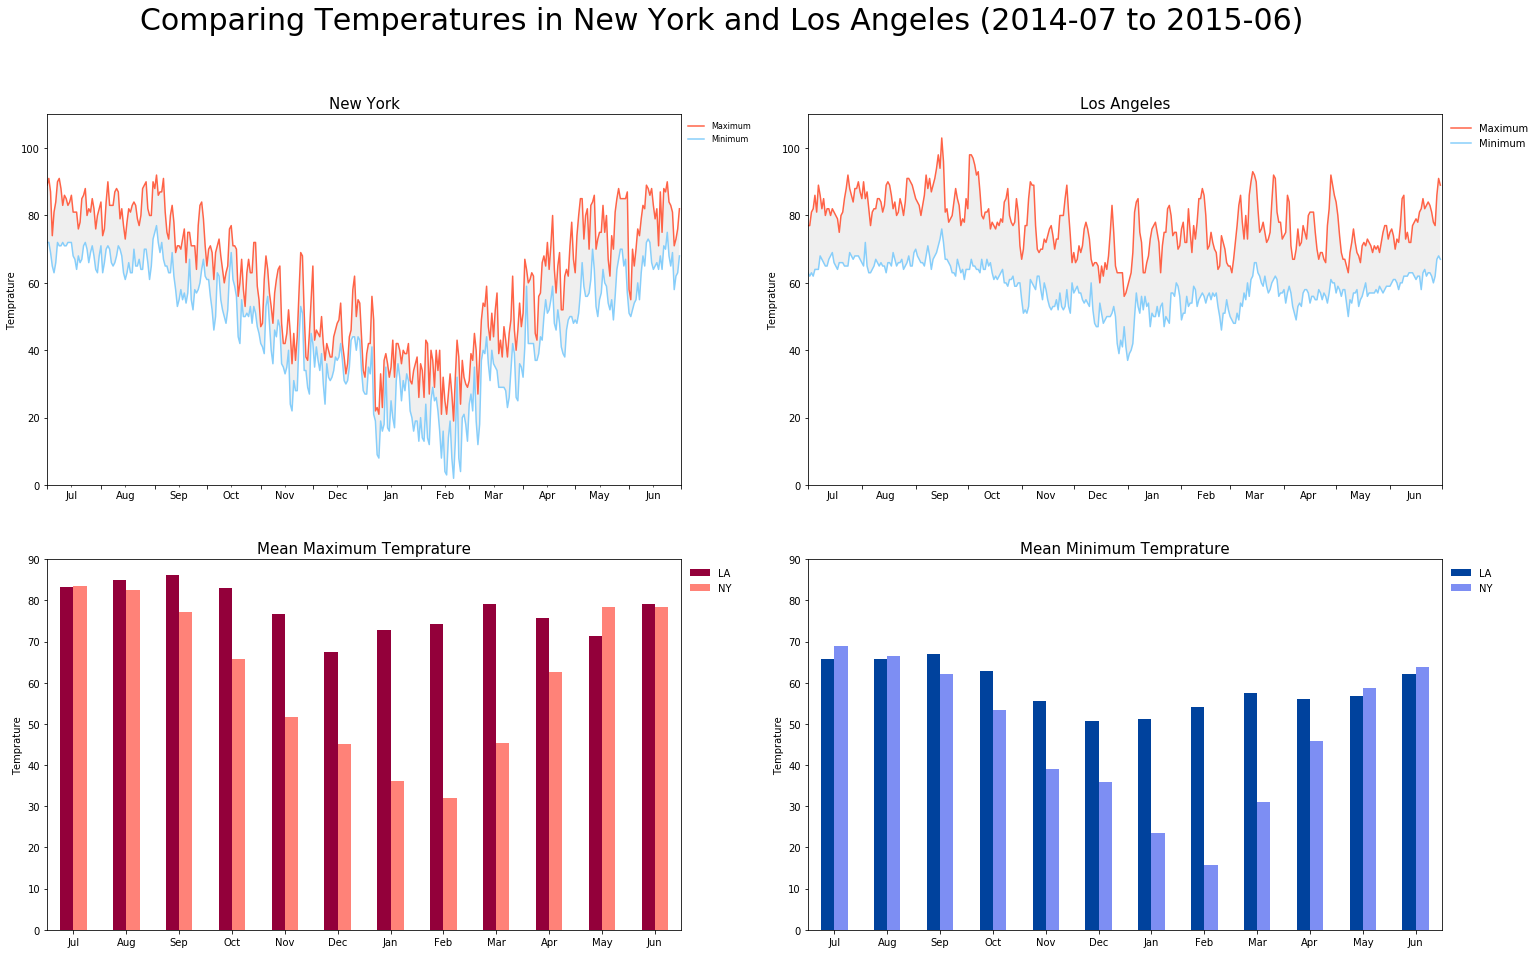

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.ticker as ticker


%matplotlib notebook
%matplotlib inline

#import datasets
NY = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KNYC.csv')
LA = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KCQT.csv')

#formatting dates
NY['date'] = pd.to_datetime(NY['date'])
NY['Year-Month'] = NY['date'].dt.strftime('%y-%m')

LA['date'] = pd.to_datetime(LA['date'])
LA['Year-Month'] = LA['date'].dt.strftime('%y-%m')

#find monthly mean temratures
NY_max_mean = NY.groupby(['Year-Month'])['actual_max_temp'].mean()
NY_min_mean = NY.groupby(['Year-Month'])['actual_min_temp'].mean()

LA_max_mean = LA.groupby(['Year-Month'])['actual_max_temp'].mean()
LA_min_mean = LA.groupby(['Year-Month'])['actual_min_temp'].mean()

#create dataframe of mean tempratures
#labels= np.arange('2014-07','2015-07', dtype='datetime64[M]').tolist()
labels = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
max_df = pd.DataFrame({'NY': NY_max_mean.values,'LA': LA_max_mean.values}, index=labels)
min_df = pd.DataFrame({'NY': NY_min_mean.values,'LA': LA_min_mean.values}, index=labels)

#start plotting
fig, axs = plt.subplots(2, 2)
fig.set_figheight(15)
fig.set_figwidth(25)

#x axis index for min and max tempratures in New York
x_index = np.arange('2014-07-01','2015-07-01', dtype='datetime64[D]')
axs[0,0].plot(x_index, NY['actual_max_temp'],color='tomato')
axs[0,0].plot(x_index, NY['actual_min_temp'],color='lightskyblue')
axs[0,0].legend(['Maximum','Minimum'], loc='upper left', frameon=False, prop={"size":8}, bbox_to_anchor=(1,1))
axs[0,0].fill_between(x_index, NY['actual_max_temp'], NY['actual_min_temp'], facecolor='silver', alpha=0.25)

#x axis index for min and max tempratures in Los Angeles
axs[0,1].plot(x_index, LA['actual_max_temp'],color='tomato')
axs[0,1].plot(x_index, LA['actual_min_temp'],color='lightskyblue')
axs[0,1].legend(['Maximum','Minimum'], loc='upper left', frameon=False, prop={"size":10}, bbox_to_anchor=(1,1))
axs[0,1].fill_between(x_index, LA['actual_max_temp'], LA['actual_min_temp'], facecolor='silver', alpha=0.25)

#bar plots to compare mean tempratures
max_df.plot.bar(rot =0, ax = axs[1,0], capsize=15, color=['#93003a', '#ff8278'])
min_df.plot.bar(rot =0, ax = axs[1,1], capsize=15, color=['#00429d', '#7d8ef3'])
axs[1,0].set_ylim([0, 90])
axs[1,0].legend(loc='upper left', frameon=False, prop={"size":10}, bbox_to_anchor=(1,1))
axs[1,1].set_ylim([0, 90])
axs[1,1].legend(loc='upper left', frameon=False, prop={"size":10}, bbox_to_anchor=(1,1))

#scatter plots for precipitation
#NY_precipitation = NY[(NY.actual_precipitation > 0)]
#axs[0,0].scatter(NY_precipitation.date.values, NY_precipitation.actual_mean_temp.values, s = 10, color='maroon')

#LA_precipitation = LA[(LA.actual_precipitation > 0)]
#axs[0,1].scatter(LA_precipitation.date.values, LA_precipitation.actual_mean_temp.values, s = 10, color='maroon')

#set titles
fig.suptitle('Comparing Temperatures in New York and Los Angeles (2014-07 to 2015-06)', fontsize=30)
axs[0,0].set_title("New York", fontsize=15)
axs[0,1].set_title("Los Angeles", fontsize=15)
axs[1,0].set_title("Mean Maximum Temprature", fontsize=15)
axs[1,1].set_title("Mean Minimum Temprature", fontsize=15)


#set ticks and labels
for ax in axs[0]:
    ax.axis(['2014/07/01','2015/07/01',0,110])
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday = 15)) 
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
    ax.set(ylabel='Temprature')

axs[1,0].set(ylabel='Temperature')
axs[1,1].set(ylabel='Temperature')
    
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
